## Mental Health of Med Students Data Visualization and Analysis

> Haley Chokshi

The dataset that has been chosen is one that looks at the mentla health of medical students from Switzerland. The data looks at demographic factors such as age, sex and language spoken as well as internal measures such as psychological distress, MBI Scores, self-reported health status, and empathy rating scales. The end goal of this analysis is to better understand whether or not medical student's mental health is affecting their everyday life, especially in their job. 

### Imports

First, I imported four different libraries to help with the visualization and to help better understand the bigger picture of the data. I imported `pandas` for data manipulation and analysis, `numpy` for large mathamatical functions, `mathplotlib` for graphing and mathamatical visualization, and `seaborn` for statistical data visualization. 

These libraies are a collection of different everyday functions that are very tedious to do with python alone, so with the help of these libraries we can better analyze and visualize data without writing hundereds of lines of code. 

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Now that the liberaries have been imported, the data file is now imported so the data can be understood and looked at through code.

In [24]:
# import the data
df = pd.read_csv('Data Carrard et al. 2022 MedTeach.csv')

### Data Verifiction 

Make sure sure the file was imported correctly by printing out the first 5 columns of the dataset

In [25]:
df.head()

,id,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
0,2,18,1,1,120,1,0,56,3,0,88,62,27,17,0.738095,34,61,17,13,20
1,4,26,4,1,1,1,0,20,4,0,109,55,37,22,0.690476,7,33,14,11,26
2,9,21,3,2,1,0,0,36,3,0,106,64,39,17,0.690476,25,73,24,7,23
3,10,21,2,2,1,0,1,51,5,0,101,52,33,18,0.833333,17,48,16,10,21
4,13,21,3,1,1,1,0,22,4,0,102,58,28,21,0.690476,14,46,22,14,23


Now, I've checked the data types so I know what type of values are saved and if they need to be adjusted at all

In [26]:
# check the data types
df.dtypes

id             int64
age            int64
year           int64
sex            int64
glang          int64
part           int64
job            int64
stud_h         int64
health         int64
psyt           int64
jspe           int64
qcae_cog       int64
qcae_aff       int64
amsp           int64
erec_mean    float64
cesd           int64
stai_t         int64
mbi_ex         int64
mbi_cy         int64
mbi_ea         int64
dtype: object

### Data Table of Contents 

### Health of Students

One question that was asked was "How satisfied are you with your health?" u The answers ranged from 1 = Very dissatisfied; 2 = Dissatisfied; 3 = Neither satisfied nor dissatisfied; 4 = Satisfied; 5 = Very satisfied

Here, we can find the average of the health column

In [27]:
# return the average of the health column
health_column = df['health']
health_column.mean()

3.7776523702031604

We can also create a graph that shows the distribution of participants' answers to the health question.

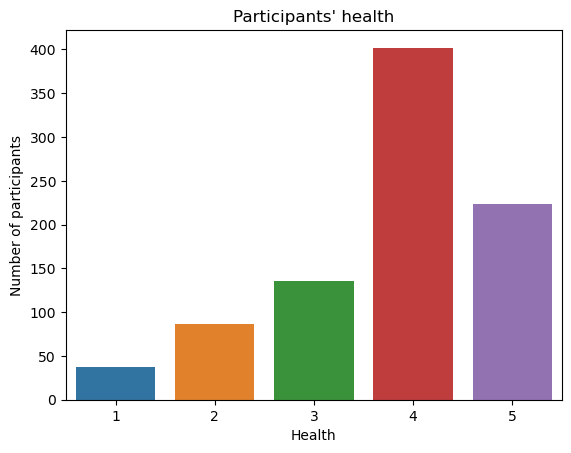

In [28]:
# Create a bar graph of the number of participants who answered 1-5 in the health column
# add a title called "Participants' health" and labels
sns.countplot(x='health', data=df)
sns.countplot(x='health', data=df)
plt.title("Participants' health")
plt.xlabel('Health')
plt.ylabel('Number of participants')
plt.show()


Now we can change the color of the columns to blue.

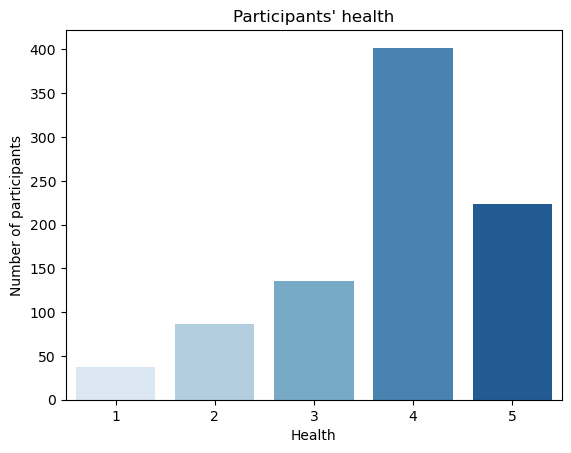

In [29]:
# make the colors of the bars in the graph above different shades of blue
sns.countplot(x='health', data=df, palette='Blues')
plt.title("Participants' health")
plt.xlabel('Health')
plt.ylabel('Number of participants')
plt.show()


The mean of this health satisfaction column is around 4 (3.778), which means the average medical student is satisfied with their health.

### Psychotherapy

This section is to help us understand how many medical students consulted a psychotherapist or a psychiatrist for their health in the last year. 

We are going to find the number of participants who said no (0) to consulting a psychotherapist or psychiatrist and those who said yes (1).

In [30]:
# return the number of participants who answer 0 (no) in the psyt column
psyt_column = df['psyt']
psyt_column[psyt_column == 0].count()   


687

In [31]:
# return the number of participants who answer 1 (yes) in the psyt column
psyt_column[psyt_column == 1].count()

199

In [37]:
#create a table that shows the number of participants who answered 0 (no) and 1 (yes) in the psyt column
pd.crosstab(index=df['psyt'], columns='count')


col_0,count
psyt,
0,687
1,199


Now we will create a graph to better understand the number of medical students who said yes and no to counsulting a psycotherapist or psychiatrist for help 

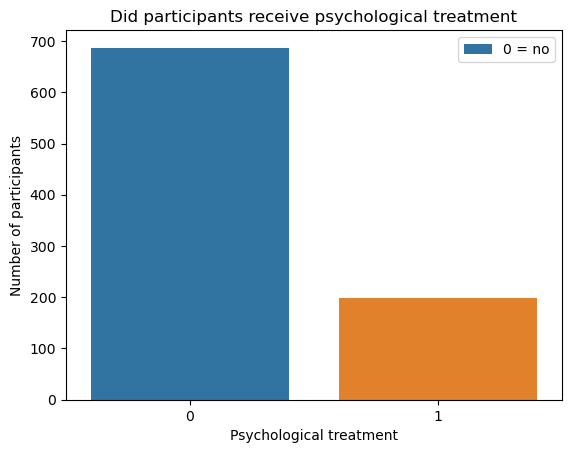

In [ ]:
# create a graph of the number of participants who answered 0 or 1 in the psyt column
# add a title called "Participants' psychological treatment" and labels
sns.countplot(x='psyt', data=df)
plt.title("Did participants receive psychological treatment")
plt.xlabel('Psychological treatment')
plt.ylabel('Number of participants')
plt.legend(labels=['0 = no', '1 = yes'])
plt.show()


The graph isn't showing the 1 = yes on the legend

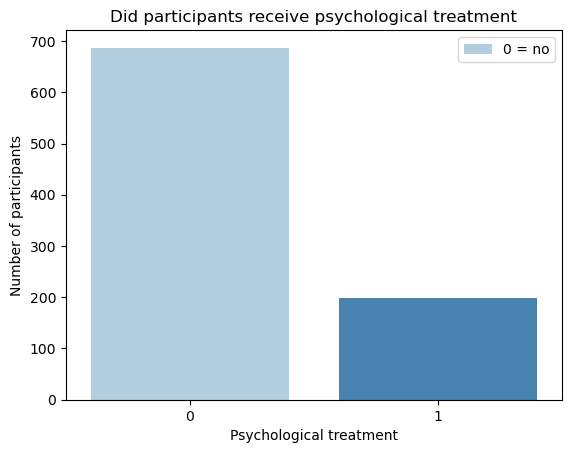

In [ ]:
# take the graph above and add different shades of blue to the bars and add 1 = yes to the legend
sns.countplot(x='psyt', data=df, palette='Blues')
plt.title("Did participants receive psychological treatment")
plt.xlabel('Psychological treatment')
plt.ylabel('Number of participants')
plt.legend(labels=['0 = no', '1 = yes'])
plt.show()


### Hours Studied

Now we can look at the hours studied and the statistical data of this column. 

First, the mean and median of the Hours Studied column.

In [41]:
# return the mean and median of stud_h column 
stud_h_column = df['stud_h']
stud_h_column.mean()
stud_h_column.median()
# make a table that shows the mean and median of the stud_h column
pd.DataFrame({'Mean': [stud_h_column.mean()], 'Median': [stud_h_column.median()]})


,Mean,Median
0,25.288939,25.0


In [ ]:
# find the number of participants who answered 0 (no) in the psyt column and also have a health score of 3 or lower
psyt_column[(psyt_column == 0) & (health_column <= 3)].count()


178

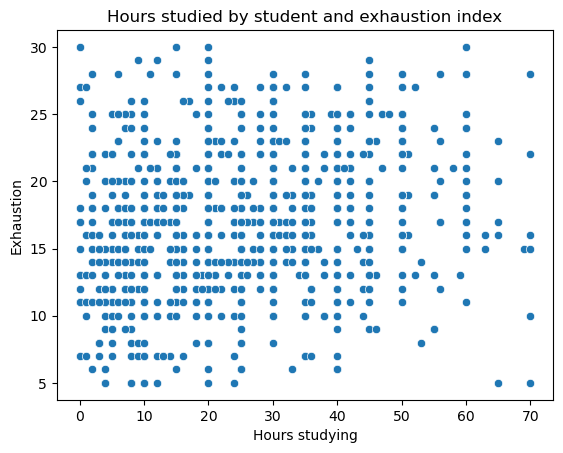

In [ ]:
# create a scatterplot for the stud_h column and the mbi_ex column
# add a title called "Student health and exhaustion" and labels
sns.scatterplot(x='stud_h', y='mbi_ex', data=df)
plt.title("Hours studied by student and exhaustion index")
plt.xlabel('Hours studying')
plt.ylabel('Exhaustion')
plt.show()


In [ ]:
# return the r value for the correlation between the stud_h column and the mbi_ex column
df['stud_h'].corr(df['mbi_ex'])

0.1858042644519435

In [ ]:
average_jspe = df['jspe'].mean()
average_jspe


106.37471783295712

In [ ]:
average_mbi_ex = df['mbi_ex'].mean()
average_mbi_ex

16.878103837471784

In [ ]:
average_mbi_cy = df['mbi_cy'].mean()
average_mbi_cy

10.079006772009029

In [ ]:
average_mbi_ea = df['mbi_ea'].mean()
average_mbi_ea

24.20767494356659